In [1]:
import pandas as pd
import networkx as nx
from networkx.algorithms import community
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

plt.rcParams['figure.figsize'] = [10, 7]
%config InlineBackend.figure_format = 'retina'

In [2]:
data = pd.read_csv("../datasets/heroes/hero-network.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574467 entries, 0 to 574466
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   hero1   574467 non-null  object
 1   hero2   574467 non-null  object
dtypes: object(2)
memory usage: 8.8+ MB


In [4]:
data.head()

,hero1,hero2
0,"LITTLE, ABNER",PRINCESS ZANDA
1,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
2,BLACK PANTHER/T'CHAL,PRINCESS ZANDA
3,"LITTLE, ABNER",PRINCESS ZANDA
4,"LITTLE, ABNER",BLACK PANTHER/T'CHAL


In [5]:
graph = nx.from_pandas_edgelist(data, source='hero1', target='hero2')

In [6]:
print(nx.info(graph))

Graph with 6426 nodes and 167219 edges


In [7]:
print("Network density:", nx.density(graph))

Network density: 0.00810031232553549


### New subnetwork

In [8]:
heroes = {
 'MEDUSA/MEDUSALITH AM',
 'ARCLIGHT/PHILLIPA SO',
 'WOLVERINE/LOGAN ',
 'SCARLET WITCH/WANDA ',
 'ARAGORN',
 'OVERMIND/GROM',
 'BATTLEAXE/',
 'ION/',
 'PINK PEARL/'
}

In [9]:
relations = data[(data.hero1.isin(heroes)) & (data.hero2.isin(heroes))]

In [10]:
relations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 895 to 573288
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   hero1   103 non-null    object
 1   hero2   103 non-null    object
dtypes: object(2)
memory usage: 2.4+ KB


In [11]:
relations.head()

,hero1,hero2
895,SCARLET WITCH/WANDA,WOLVERINE/LOGAN
16777,SCARLET WITCH/WANDA,WOLVERINE/LOGAN
29525,WOLVERINE/LOGAN,SCARLET WITCH/WANDA
30832,WOLVERINE/LOGAN,SCARLET WITCH/WANDA
33894,MEDUSA/MEDUSALITH AM,WOLVERINE/LOGAN


### Metrics

In [12]:
sub_graph = nx.from_pandas_edgelist(relations, source='hero1', target='hero2')

In [13]:
print(nx.info(sub_graph))
print("\nNetwork density:", nx.density(sub_graph))

Graph with 9 nodes and 13 edges

Network density: 0.3611111111111111


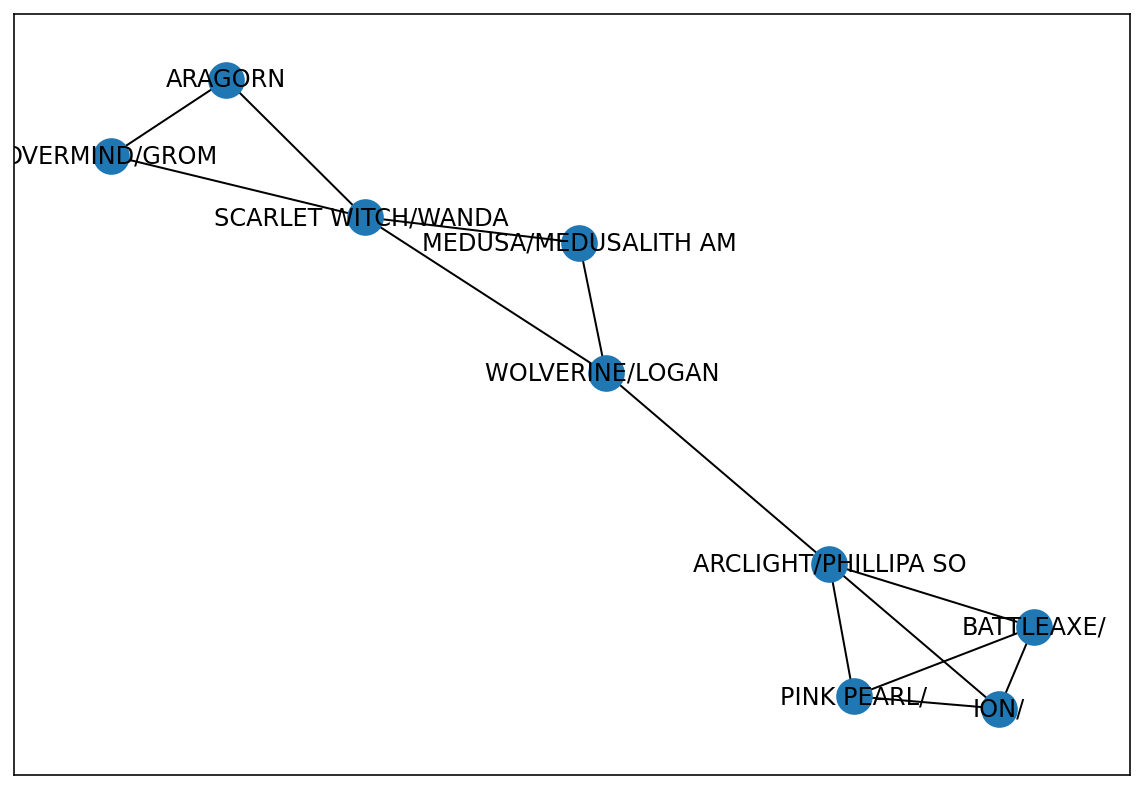

In [14]:
nx.draw_networkx(sub_graph)

In [15]:
print('Diameter of the subgraph: {}'.format(nx.diameter(sub_graph)))

Diameter of the subgraph: 4


In [16]:
overmind_ion_path = nx.shortest_path(
 sub_graph, source="OVERMIND/GROM", target="ION/"
)

print("Shortest path between Overmind and ion is:")

for item in overmind_ion_path:
    print ("− ", item)

print("With length {}".format(len(overmind_ion_path)))

Shortest path between Overmind and ion is:
−  OVERMIND/GROM
−  SCARLET WITCH/WANDA 
−  WOLVERINE/LOGAN 
−  ARCLIGHT/PHILLIPA SO
−  ION/
With length 5


In [17]:
nx.eccentricity(sub_graph)

{'SCARLET WITCH/WANDA ': 3,
 'WOLVERINE/LOGAN ': 2,
 'MEDUSA/MEDUSALITH AM': 3,
 'ARAGORN': 4,
 'OVERMIND/GROM': 4,
 'ARCLIGHT/PHILLIPA SO': 3,
 'ION/': 4,
 'BATTLEAXE/': 4,
 'PINK PEARL/': 4}

In [18]:
dict(sub_graph.degree(sub_graph.nodes()))

{'SCARLET WITCH/WANDA ': 4,
 'WOLVERINE/LOGAN ': 3,
 'MEDUSA/MEDUSALITH AM': 2,
 'ARAGORN': 2,
 'OVERMIND/GROM': 2,
 'ARCLIGHT/PHILLIPA SO': 4,
 'ION/': 3,
 'BATTLEAXE/': 3,
 'PINK PEARL/': 3}

In [28]:
scarlet_arclight_path = nx.shortest_path(
sub_graph, source="SCARLET WITCH/WANDA ", target="ARCLIGHT/PHILLIPA SO")

print("Shortest path between Scarlet and Arclight is:")

for item in scarlet_arclight_path:
    print ("− ", item)

print("With length {}".format(len(scarlet_arclight_path)))

Shortest path between Scarlet and Arclight is:
−  SCARLET WITCH/WANDA 
−  WOLVERINE/LOGAN 
−  ARCLIGHT/PHILLIPA SO
With length 3


In [20]:
nx.betweenness_centrality(sub_graph)

{'SCARLET WITCH/WANDA ': 0.42857142857142855,
 'WOLVERINE/LOGAN ': 0.5714285714285714,
 'MEDUSA/MEDUSALITH AM': 0.0,
 'ARAGORN': 0.0,
 'OVERMIND/GROM': 0.0,
 'ARCLIGHT/PHILLIPA SO': 0.5357142857142857,
 'ION/': 0.0,
 'BATTLEAXE/': 0.0,
 'PINK PEARL/': 0.0}

In [21]:
for item in community.greedy_modularity_communities(sub_graph):
    print("\nCommunity: ")
    for hero in item:
        print("− ", hero)


Community: 
−  OVERMIND/GROM
−  MEDUSA/MEDUSALITH AM
−  ARAGORN
−  WOLVERINE/LOGAN 
−  SCARLET WITCH/WANDA 

Community: 
−  BATTLEAXE/
−  ION/
−  ARCLIGHT/PHILLIPA SO
−  PINK PEARL/


In [22]:
modularity_dict = {}

for i,c in enumerate(community.greedy_modularity_communities(sub_graph)):
    for name in c:
        modularity_dict[name] = i

modularity_dict

{'OVERMIND/GROM': 0,
 'MEDUSA/MEDUSALITH AM': 0,
 'ARAGORN': 0,
 'WOLVERINE/LOGAN ': 0,
 'SCARLET WITCH/WANDA ': 0,
 'BATTLEAXE/': 1,
 'ION/': 1,
 'ARCLIGHT/PHILLIPA SO': 1,
 'PINK PEARL/': 1}

In [25]:
comm = community.greedy_modularity_communities(sub_graph)

l = [list(c) for c in comm]
k = sub_graph.subgraph(l[0])

print(nx.info(k))
print("\nNetwork density: {} \n".format(nx.density(k)))

k2 = sub_graph.subgraph(l[1])

print(nx.info(k2))
print("\nNetwork density:", nx.density(k2))

Graph with 5 nodes and 6 edges

Network density: 0.6 

Graph with 4 nodes and 6 edges

Network density: 1.0


In [26]:
print("Shortest paths:")

sp = nx.eccentricity(k)

for hero in sp:
    print ("− ", hero, ": ", sp[hero])

ce = dict(sub_graph.degree(k.nodes()))

print("\nConnected edges:")

for hero in ce:
    print ("− ", hero, ": ", ce[hero])

print("\nBetweenness:")

bet = nx.betweenness_centrality(k)

for hero in bet:
    print ("− ", hero, ": ", bet[hero])

Shortest paths:
−  SCARLET WITCH/WANDA  :  1
−  WOLVERINE/LOGAN  :  2
−  MEDUSA/MEDUSALITH AM :  2
−  ARAGORN :  2
−  OVERMIND/GROM :  2

Connected edges:
−  SCARLET WITCH/WANDA  :  4
−  WOLVERINE/LOGAN  :  3
−  MEDUSA/MEDUSALITH AM :  2
−  ARAGORN :  2
−  OVERMIND/GROM :  2

Betweenness:
−  SCARLET WITCH/WANDA  :  0.6666666666666666
−  WOLVERINE/LOGAN  :  0.0
−  MEDUSA/MEDUSALITH AM :  0.0
−  ARAGORN :  0.0
−  OVERMIND/GROM :  0.0
